In [1]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a function that will format the table read from the Wikipedia pages
def format_df(df_pop):
    """
    Function to format the columns of the DataFrame
    """
    
    # Drop the second column
    df_pop = df_pop.drop(2, axis=1)

    # Rename the columns
    df_pop.columns = ['Year', 'Pop', 'Variation (%)']

    # Remove the last line
    df_pop = df_pop[:-1]

    # Set the year as index
    df_pop = df_pop.set_index('Year', drop=True)

    # Population column as integers
    df_pop['Pop'] = df_pop['Pop'].astype(int)

    # Get the variation as numbers
    df_pop['Variation (%)'] = pd.to_numeric(df_pop['Variation (%)'].str.strip('%').str.replace('−', '-'), errors='coerce')

    return df_pop

In [3]:
################################################################
###                                                          ###
###   The code below will not run on the Coursera platform   ###
###                                                          ###
################################################################

# Read the historical population from Ann Arbor
df_annarbor = pd.read_html('https://en.wikipedia.org/wiki/Ann_Arbor%2C_Michigan', skiprows=2)[5]
df_annarbor = format_df(df_annarbor)

# Read the historical population from the State of Michigan
df_michigan = pd.read_html('https://en.wikipedia.org/wiki/Michigan', skiprows=2)[8]
df_michigan = format_df(df_michigan)

# Read the historical population from the Detroit metropolitan area
df_metro = pd.read_html('https://en.wikipedia.org/wiki/Metro_Detroit', skiprows=2)[1]
df_metro = format_df(df_metro)

# Read the historical population from the city of Detroit
df_detroit = pd.read_html('https://en.wikipedia.org/wiki/Detroit', skiprows=2)[6]
df_detroit = format_df(df_detroit)

In [4]:
# Merge the DataFrames
df1 = pd.merge(df_annarbor, df_michigan, left_index=True, right_index=True, suffixes=(' - Ann Arbor', ' - Michigan'))
df2 = pd.merge(df_metro, df_detroit, left_index=True, right_index=True, suffixes=(' - Metropolitan area', ' - Detroit'))
df_all = pd.merge(df1, df2, left_index=True, right_index=True)

# Remove rows with missing values
df_all = df_all.dropna()

# Convert index values to integers
df_all.index = pd.to_numeric(df_all.index)

In [5]:
# Print the column names as a list
df_all.columns.tolist()

['Pop - Ann Arbor',
 'Variation (%) - Ann Arbor',
 'Pop - Michigan',
 'Variation (%) - Michigan',
 'Pop - Metropolitan area',
 'Variation (%) - Metropolitan area',
 'Pop - Detroit',
 'Variation (%) - Detroit']

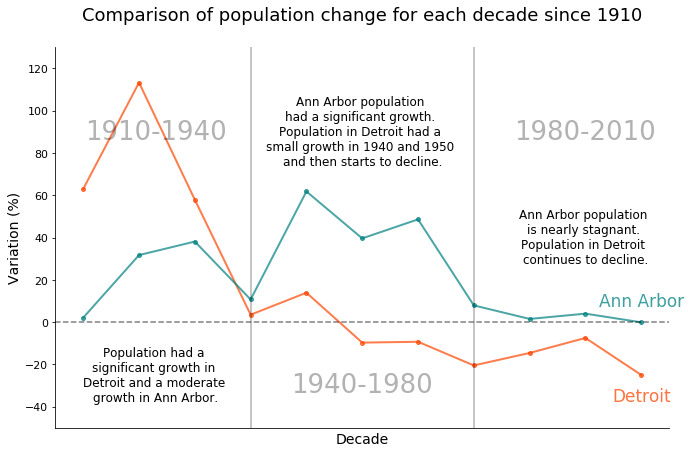

In [6]:
###################################################
###                                             ###
###   The code in this cell plots the figure    ###
###                                             ###
###################################################

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(11,7))

# Plot the data from Detroit
plt.plot(df_all['Variation (%) - Detroit'], label = 'Detroit', marker='.', markersize=8, 
         color='orangered', alpha=0.7, linewidth=2)

# Plot the data from Ann Arbor
plt.plot(df_all['Variation (%) - Ann Arbor'], label = 'Ann Arbor', marker='.', markersize=8, 
         color='teal', alpha=0.7, linewidth=2)

# Create a line where the population is stagnant (y = 0)
plt.axhline(0, color='k', alpha=0.5, linestyle='--')

# Insert the text describing each period
plt.text(1923, -25, "Population had a \nsignificant growth in \nDetroit and a moderate \ngrowth in Ann Arbor.", 
         fontsize=12, ha='center', va='center')
plt.text(1960, 90, "Ann Arbor population \nhad a significant growth. \nPopulation in Detroit had a \nsmall growth in 1940 and 1950 \nand then starts to decline.", 
         fontsize=12, ha='center', va='center')
plt.text(2000, 40, "Ann Arbor population \nis nearly stagnant. \nPopulation in Detroit \ncontinues to decline.", 
         fontsize=12, ha='center', va='center')

# Include the periods ranges
plt.text(1923,  90, "1910-1940", fontsize=26, color='k', alpha=0.3, ha='center', va='center')
plt.text(1960, -30, "1940-1980", fontsize=26, color='k', alpha=0.3, ha='center', va='center')
plt.text(2000,  90, "1980-2010", fontsize=26, color='k', alpha=0.3, ha='center', va='center')

# Create vertical lines to identify the periods 
plt.axvline(1940, color='k', alpha=0.3)
plt.axvline(1980, color='k', alpha=0.3)

# Include tick labels for every row in the DataFrame and adjust the fontsize
plt.xticks([], fontsize=11)
plt.yticks(fontsize=11)

# Include the x and y labels
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Variation (%)', fontsize=14)

# Give a title
plt.title("Comparison of population change for each decade since 1910\n", fontsize=18)

# Adjust the y range
plt.ylim(-50, 130)

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the lines
plt.text(2010,  10, "Ann Arbor", color='teal', alpha=0.75, ha='center', va='center', fontsize=17)
plt.text(2010, -35, "Detroit", color='orangered', alpha=0.75, ha='center', va='center', fontsize=17)

# Save the image
plt.savefig('population_comparison.png', dpi=300)

# Show the figure
plt.show()